<a href="https://colab.research.google.com/github/jimmy93029/NYCU_Artificial_Intelligence_Capstone_Labs/blob/main/ai_capstone_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation


In [ ]:
!apt-get install -y swig
!pip install box2d-py==2.3.5 --no-build-isolation

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  swig4.0
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 30 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 0s (3,961 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [ ]:
!pip install "gymnasium[atari, accept-rom-license]"

In [ ]:
!pip install stable-baselines3[extra] torch torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
!pip install gymnasium[accept-rom-license,atari]

In [ ]:
!pip install Shimmy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Base_dir = "/content/drive/MyDrive/AI_capstone"

# Task 1 : Comparison on Atari

```
# 此內容會顯示為程式碼
```

67421

In [ ]:
import ale_py
# if using gymnasium
import shimmy
import torch
import torch.nn as nn
import torch.optim as optim
import gymnasium as gym


In [ ]:
import matplotlib as plt

def plot_rewards(reward_dict):
    plt.figure(figsize=(10, 6))
    for label, rewards in reward_dict.items():
        plt.plot(rewards, label=label)
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.title("Policy Comparison")
    plt.legend()
    plt.grid(True)
    plt.show()


## train

### train REINFORCE

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import gymnasium as gym
import numpy as np


class CNNREINFORCEPolicy(nn.Module):
    def __init__(self, act_dim):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 8, 4), nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2), nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1), nn.ReLU()
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 22 * 16, 512), nn.ReLU(),
            nn.Linear(512, act_dim),
            nn.Softmax(dim=-1)
        )

    def forward(self, obs):
        if isinstance(obs, np.ndarray):
            obs = torch.tensor(obs, dtype=torch.float32)
        obs = obs.permute(2, 0, 1).unsqueeze(0) / 255.0
        return self.fc(self.conv(obs)).squeeze(0)


class CNNValueNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 8, 4), nn.ReLU(),
            nn.Conv2d(32, 64, 4, 2), nn.ReLU(),
            nn.Conv2d(64, 64, 3, 1), nn.ReLU()
        )
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 22 * 16, 512), nn.ReLU(),
            nn.Linear(512, 1)
        )

    def forward(self, obs):
        if isinstance(obs, np.ndarray):
            obs = torch.tensor(obs, dtype=torch.float32)
        obs = obs.permute(2, 0, 1).unsqueeze(0) / 255.0
        return self.fc(self.conv(obs)).squeeze()


In [ ]:

def train_reinforce_variant(env_id, variant="original", num_episodes=500, lr=1e-4, gamma=0.99):
    env = gym.make(env_id)
    policy = CNNREINFORCEPolicy(env.action_space.n)
    optimizer = optim.Adam(policy.parameters(), lr=lr)

    if variant == "advantage":
        value_net = CNNValueNet()
        value_optimizer = optim.Adam(value_net.parameters(), lr=lr)

    for ep in range(num_episodes):
        obs, _ = env.reset()
        log_probs, rewards, states = [], [], []
        done = False

        while not done:
            probs = policy(obs)
            dist = torch.distributions.Categorical(probs)
            action = dist.sample()
            log_probs.append(dist.log_prob(action))
            states.append(obs)
            obs, reward, done, truncated, _ = env.step(action.item())
            rewards.append(reward)

        # Compute returns G_t
        G = 0
        returns = []
        for r in reversed(rewards):
            G = r + gamma * G
            returns.insert(0, G)
        returns = torch.tensor(returns, dtype=torch.float32)

        # Compute loss
        if variant == "baseline":
            baseline = returns.mean()
            advantages = returns - baseline
        elif variant == "advantage":
            values = torch.stack([value_net(s) for s in states])
            advantages = returns - values.detach()

            value_loss = nn.functional.mse_loss(values, returns)
            value_optimizer.zero_grad()
            value_loss.backward()
            value_optimizer.step()
        else:
            advantages = returns

        loss = -torch.sum(torch.stack(log_probs) * advantages)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        print(f"[{variant.upper()}] Ep {ep+1}/{num_episodes} | Reward: {sum(rewards):.1f}")

    env.close()
    model_path = f"/content/drive/MyDrive/AI_capstone/{env_id.split('/')[-1]}_{variant}_REINFORCE.pth"
    torch.save(policy.state_dict(), model_path)
    print(f"✅ Saved model: {model_path}")


## test

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from gymnasium.wrappers import RecordVideo
import os
import gymnasium as gym

def evaluate_reinforce(env_id, model_path, episodes=10, variant="original"):
    # Setup video directory in Google Drive
    video_dir = f"/content/drive/MyDrive/AI_capstone/videos/{env_id.replace('/', '_')}_{variant}"
    os.makedirs(video_dir, exist_ok=True)

    # Load policy
    act_dim = gym.make(env_id).action_space.n
    policy = CNNREINFORCEPolicy(act_dim)
    policy.load_state_dict(torch.load(model_path))
    policy.eval()

    # Wrap environment for video
    env = RecordVideo(
        gym.make(env_id, render_mode="rgb_array"),
        video_dir,
        episode_trigger=lambda ep: ep == 0,
        disable_logger=True
    )

    rewards = []
    for ep in range(episodes):
        obs, _ = env.reset()
        done, total_reward, total_len = False, 0, 0

        while not done:
            with torch.no_grad():
                obs_tensor = torch.tensor(obs, dtype=torch.float32)
                probs = policy(obs_tensor)
                action = torch.argmax(probs).item()
            obs, reward, done, truncated, _ = env.step(action)
            total_reward += reward
            total_len += 1

        rewards.append(total_reward)
        print(f"[EVAL] Episode {ep+1} | Reward: {total_reward:.2f} | Total len = {total_len}")

    env.close()
    print(f"🎥 Video saved to: {video_dir}")
    return rewards


## main

In [ ]:
envs_discrete = ["ALE/Assault-v5"]
# envs_continuous = ["CarRacing-v2", "BipedalWalker-v3"]

# train_reinforce_variant("ALE/Assault-v5", variant="original", num_episodes=100)
# train_reinforce_variant("ALE/Assault-v5", variant="baseline", num_episodes=100)
# train_reinforce_variant("ALE/Assault-v5", variant="advantage", num_episodes=100)

[ORIGINAL] Ep 1/100 | Reward: 126.0
[ORIGINAL] Ep 2/100 | Reward: 273.0
[ORIGINAL] Ep 3/100 | Reward: 126.0
[ORIGINAL] Ep 4/100 | Reward: 168.0
[ORIGINAL] Ep 5/100 | Reward: 357.0
[ORIGINAL] Ep 6/100 | Reward: 189.0
[ORIGINAL] Ep 7/100 | Reward: 231.0
[ORIGINAL] Ep 8/100 | Reward: 378.0
[ORIGINAL] Ep 9/100 | Reward: 147.0
[ORIGINAL] Ep 10/100 | Reward: 252.0
[ORIGINAL] Ep 11/100 | Reward: 210.0
[ORIGINAL] Ep 12/100 | Reward: 210.0
[ORIGINAL] Ep 13/100 | Reward: 399.0
[ORIGINAL] Ep 14/100 | Reward: 231.0
[ORIGINAL] Ep 15/100 | Reward: 273.0
[ORIGINAL] Ep 16/100 | Reward: 252.0
[ORIGINAL] Ep 17/100 | Reward: 189.0
[ORIGINAL] Ep 18/100 | Reward: 378.0
[ORIGINAL] Ep 19/100 | Reward: 273.0
[ORIGINAL] Ep 20/100 | Reward: 252.0
[ORIGINAL] Ep 21/100 | Reward: 189.0
[ORIGINAL] Ep 22/100 | Reward: 336.0
[ORIGINAL] Ep 23/100 | Reward: 189.0
[ORIGINAL] Ep 24/100 | Reward: 189.0
[ORIGINAL] Ep 25/100 | Reward: 210.0
[ORIGINAL] Ep 26/100 | Reward: 189.0
[ORIGINAL] Ep 27/100 | Reward: 168.0
[ORIGINAL]

In [ ]:
rewards_original = evaluate_reinforce(
    "ALE/Assault-v5",
    f"{Base_dir}/Assault-v5_original_REINFORCE.pth",
    variant="original"
)

rewards_baseline = evaluate_reinforce(
    "ALE/Assault-v5",
    f"{Base_dir}/Assault-v5_baseline_REINFORCE.pth",
    variant="baseline"
)

rewards_advantage = evaluate_reinforce(
    "ALE/Assault-v5",
    f"{Base_dir}/Assault-v5_advantage_REINFORCE.pth",
    variant="advantage"
)


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/drive/MyDrive/AI_capstone/videos/ALE_Assault-v5_original folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


[EVAL] Episode 1 | Reward: 609.00 | Total len = 694


/usr/local/lib/python3.11/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """


[EVAL] Episode 2 | Reward: 546.00 | Total len = 630
[EVAL] Episode 3 | Reward: 210.00 | Total len = 487
[EVAL] Episode 4 | Reward: 399.00 | Total len = 631
[EVAL] Episode 5 | Reward: 525.00 | Total len = 711
[EVAL] Episode 6 | Reward: 252.00 | Total len = 455
[EVAL] Episode 7 | Reward: 420.00 | Total len = 711
[EVAL] Episode 8 | Reward: 294.00 | Total len = 391
[EVAL] Episode 9 | Reward: 504.00 | Total len = 599
[EVAL] Episode 10 | Reward: 441.00 | Total len = 663
🎥 Video saved to: /content/drive/MyDrive/AI_capstone/videos/ALE_Assault-v5_original


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/drive/MyDrive/AI_capstone/videos/ALE_Assault-v5_baseline folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


[EVAL] Episode 1 | Reward: 609.00 | Total len = 694
[EVAL] Episode 2 | Reward: 378.00 | Total len = 550
[EVAL] Episode 3 | Reward: 462.00 | Total len = 647
[EVAL] Episode 4 | Reward: 399.00 | Total len = 631
[EVAL] Episode 5 | Reward: 420.00 | Total len = 631
[EVAL] Episode 6 | Reward: 252.00 | Total len = 455
[EVAL] Episode 7 | Reward: 420.00 | Total len = 711
[EVAL] Episode 8 | Reward: 399.00 | Total len = 679
[EVAL] Episode 9 | Reward: 504.00 | Total len = 599
[EVAL] Episode 10 | Reward: 525.00 | Total len = 695
🎥 Video saved to: /content/drive/MyDrive/AI_capstone/videos/ALE_Assault-v5_baseline


/usr/local/lib/python3.11/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/drive/MyDrive/AI_capstone/videos/ALE_Assault-v5_advantage folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


[EVAL] Episode 1 | Reward: 609.00 | Total len = 694
[EVAL] Episode 2 | Reward: 378.00 | Total len = 550
[EVAL] Episode 3 | Reward: 210.00 | Total len = 487
[EVAL] Episode 4 | Reward: 399.00 | Total len = 631
[EVAL] Episode 5 | Reward: 525.00 | Total len = 711
[EVAL] Episode 6 | Reward: 252.00 | Total len = 455
[EVAL] Episode 7 | Reward: 420.00 | Total len = 711
[EVAL] Episode 8 | Reward: 399.00 | Total len = 679
[EVAL] Episode 9 | Reward: 504.00 | Total len = 599
[EVAL] Episode 10 | Reward: 441.00 | Total len = 663
🎥 Video saved to: /content/drive/MyDrive/AI_capstone/videos/ALE_Assault-v5_advantage


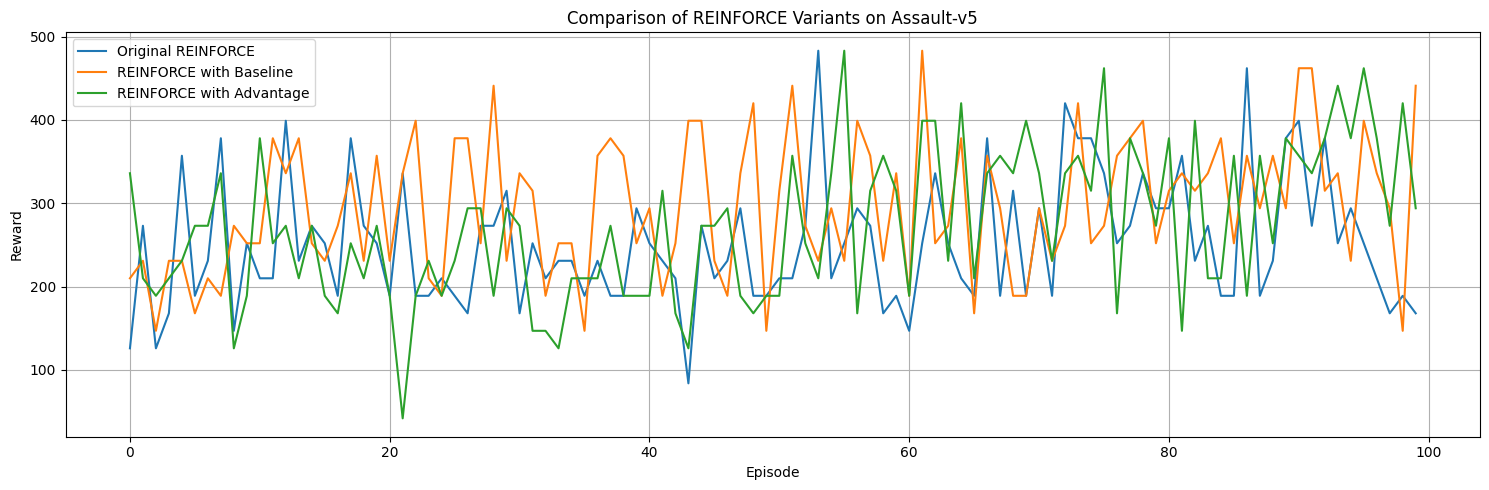

In [ ]:
# Re-import needed modules after code execution state reset
import matplotlib.pyplot as plt

# Episode rewards
original_rewards = [
    126, 273, 126, 168, 357, 189, 231, 378, 147, 252,
    210, 210, 399, 231, 273, 252, 189, 378, 273, 252,
    189, 336, 189, 189, 210, 189, 168, 273, 273, 315,
    168, 252, 210, 231, 231, 189, 231, 189, 189, 294,
    252, 231, 210, 84, 273, 210, 231, 294, 189, 189,
    210, 210, 273, 483, 210, 252, 294, 273, 168, 189,
    147, 252, 336, 252, 210, 189, 378, 189, 315, 189,
    294, 189, 420, 378, 378, 336, 252, 273, 336, 294,
    294, 357, 231, 273, 189, 189, 462, 189, 231, 378,
    399, 273, 378, 252, 294, 252, 210, 168, 189, 168,
]

baseline_rewards = [
    210, 231, 147, 231, 231, 168, 210, 189, 273, 252,
    252, 378, 336, 378, 252, 231, 273, 336, 231, 357,
    231, 336, 399, 210, 189, 378, 378, 252, 441, 231,
    336, 315, 189, 252, 252, 147, 357, 378, 357, 252,
    294, 189, 252, 399, 399, 231, 189, 336, 420, 147,
    315, 441, 273, 231, 294, 231, 399, 357, 231, 336,
    189, 483, 252, 273, 378, 168, 357, 294, 189, 189,
    294, 231, 273, 420, 252, 273, 357, 378, 399, 252,
    315, 336, 315, 336, 378, 252, 357, 294, 357, 294,
    462, 462, 315, 336, 231, 399, 336, 294, 147, 441
]

advantage_rewards = [
    336, 210, 189, 210, 231, 273, 273, 336, 126, 189,
    378, 252, 273, 210, 273, 189, 168, 252, 210, 273,
    189, 42, 189, 231, 189, 231, 294, 294, 189, 294,
    273, 147, 147, 126, 210, 210, 210, 273, 189, 189,
    189, 315, 168, 126, 273, 273, 294, 189, 168, 189,
    189, 357, 252, 210, 336, 483, 168, 315, 357, 315,
    189, 399, 399, 231, 420, 210, 336, 357, 336, 399,
    336, 231, 336, 357, 315, 462, 168, 378, 336, 273,
    378, 147, 399, 210, 210, 357, 189, 357, 252, 378,
    357, 336, 378, 441, 378, 462, 378, 273, 420, 294
]

# Plotting
plt.figure(figsize=(15, 5))

plt.plot(original_rewards, label='Original REINFORCE')
plt.plot(baseline_rewards, label='REINFORCE with Baseline')
plt.plot(advantage_rewards, label='REINFORCE with Advantage')
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Comparison of REINFORCE Variants on Assault-v5")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
print("Average Reward:")
print(f"Original  : {np.mean(rewards_original):.2f}")
print(f"Baseline  : {np.mean(rewards_baseline):.2f}")
print(f"Advantage : {np.mean(rewards_advantage):.2f}")


Average Reward:
Original  : 420.00
Baseline  : 436.80
Advantage : 413.70


TypeError: 'module' object is not callable

## Action constraint

In [ ]:
import gymnasium as gym
import numpy as np

class CarRacingSteeringConstraint(gym.ActionWrapper):
    def __init__(self, env, mini=-0.8, maxi=0.8):
        super().__init__(env)
        self.min_steering = mini
        self.max_steering = maxi

    def action(self, action):
        # Clip only the steering (index 0), pass gas/brake unchanged
        action[0] = np.clip(action[0], self.min_steering, self.max_steering)
        return action


In [ ]:
import gymnasium as gym
import numpy as np

class BipedalWalkerActionConstraint(gym.ActionWrapper):
    def __init__(self, env, mini=-0.8, maxi=0.8):
        super().__init__(env)
        self.min_action = min_action
        self.max_action = max_action

    def action(self, action):
        return np.clip(action, self.min_action, self.max_action)


In [ ]:
def wrap_with_constraints(env, env_id, mini = -1, maxi = 1):
    if "CarRacing" in env_id:
        return CarRacingSteeringConstraint(env, mini, maxi)
    if "BipedalWalker" in env_id:
        return BipedalWalkerActionConstraint(env, mini, maxi)
    return env  # default: no constraint


# Task 2 : model-free and action constraint

In [ ]:
from stable_baselines3 import PPO, A2C, SAC
from stable_baselines3.common.env_util import make_vec_env

In [ ]:
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.logger import configure
from stable_baselines3.common.env_util import make_vec_env
import os

Base_dir = "/content/drive/MyDrive/AI_capstone/"

def train_sb3(algo, env_id, total_timesteps=100_000, mini=-1, maxi=1):
    policy = "CnnPolicy" if "ALE" in env_id else "MlpPolicy"
    algo_name = algo.__name__

    log_dir = f"{Base_dir}/logs/{env_id.replace('/', '_')}_{algo_name}_min{mini}_max{maxi}"
    os.makedirs(log_dir, exist_ok=True)

    def make_env():
        env = gym.make(env_id)
        env = wrap_with_constraints(env, env_id, mini, maxi)
        return Monitor(env)

    env = make_vec_env(make_env, n_envs=1)

    model = algo(policy, env, verbose=1)
    model.set_logger(configure(log_dir, ["stdout", "csv", "tensorboard"]))

    model.learn(total_timesteps=total_timesteps)

    model_path = f"{Base_dir}/models/{env_id.replace('/', '_')}_{algo_name}_min{mini}_max{maxi}.zip"
    os.makedirs(os.path.dirname(model_path), exist_ok=True)
    model.save(model_path)

    print(f"✅ Model saved to: {model_path}")
    print(f"📁 Logs stored in: {log_dir}")


In [ ]:
import os
from gymnasium.wrappers import RecordVideo

def evaluate_sb3(model_class, model_path, env_id, episodes=10, mini=-1, maxi=1):
    model = model_class.load(model_path)

    # Build video directory with constraint values
    algo = model_class.__name__
    video_dir = f"{Base_dir}/videos/{env_id.replace('/', '_')}_{algo}_min{mini}_max{maxi}"
    os.makedirs(video_dir, exist_ok=True)

    # Apply constraint wrapper if needed
    env = gym.make(env_id, render_mode="rgb_array")
    env = wrap_with_constraints(env, env_id, mini, maxi)

    # Record only the first episode
    env = RecordVideo(
        env,
        video_dir=video_dir,
        episode_trigger=lambda ep: ep == 0,
        name_prefix=f"{env_id.replace('/', '_')}_{algo}_min{mini}_max{maxi}"
    )

    print(f"🎥 Recording to {video_dir}")

    rewards = []
    for ep in range(episodes):
        obs, _ = env.reset()
        done, total_reward = False, 0
        while not done:
            action, _ = model.predict(obs)
            obs, reward, done, truncated, _ = env.step(action)
            total_reward += reward
        rewards.append(total_reward)
        print(f"[EVAL] Episode {ep+1} | Reward: {total_reward:.2f}")

    env.close()
    print(f"✅ Finished. Video: {video_dir}")
    return rewards


## Car Racing

### non-Action-Constraint



In [ ]:
train_sb3(PPO, "CarRacing-v3", total_timesteps=100_000, mini=-1, maxi=1)

/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

Using cpu device
Wrapping the env in a VecTransposeImage.
Logging to /content/drive/MyDrive/AI_capstone//logs/CarRacing-v3_PPO_min-1_max1
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1e+03    |
|    ep_rew_mean     | -54.7    |
| time/              |          |
|    fps             | 61       |
|    iterations      | 1        |
|    time_elapsed    | 33       |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1e+03       |
|    ep_rew_mean          | -49.7       |
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 2           |
|    time_elapsed         | 86          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006340475 |
|    clip_fraction        | 0.0657      |
|    clip_range   

In [ ]:
train_sb3(A2C, "CarRacing-v3", total_timesteps=100_000, mini=-1, maxi=1)

In [ ]:
ppo_rewards = evaluate_sb3(
    PPO,
    model_path="/content/drive/MyDrive/AI_capstone/models/CarRacing-v3_PPO_min-1_max1.zip",
    env_id="CarRacing-v3",
    mini=-1,
    maxi=1
)

In [ ]:
a2c_rewards = evaluate_sb3(
    A2C,
    model_path="/content/drive/MyDrive/AI_capstone/models/CarRacing-v3_A2C_min-1_max1.zip",
    env_id="CarRacing-v3",
    mini=-1,
    maxi=1
)

In [ ]:
# Plot results
plot_rewards({
    "PPO": ppo_rewards,
    "A2C": a2c_rewards,
})

### Action-Constraint (test-time)

In [ ]:
ppo_rewards_7 = evaluate_sb3(
    PPO,
    model_path="/content/drive/MyDrive/AI_capstone/models/CarRacing-v3_PPO_min-1_max1.zip",
    env_id="CarRacing-v3",
    mini=-0.7,
    maxi=0.7
)

In [ ]:
a2c_rewards_7 = evaluate_sb3(
    A2C,
    model_path="/content/drive/MyDrive/AI_capstone/models/CarRacing-v3_A2C_min-1_max1.zip",
    env_id="CarRacing-v3",
    mini=-0.7,
    maxi=0.7
)


In [ ]:
# Plot results
plot_rewards({
    "PPO": ppo_rewards_7,
    "A2C": a2c_rewards_7,
})

### Action-Constraint (train+test time)

In [ ]:
train_sb3(PPO, "CarRacing-v3", total_timesteps=100_000, mini=-0.7, maxi=0.7)

In [ ]:
train_sb3(A2C, "CarRacing-v3", total_timesteps=100_000, mini=-0.7, maxi=0.7)

In [ ]:
ppo_rewards_7 = evaluate_sb3(
    PPO,
    model_path="/content/drive/MyDrive/AI_capstone/models/CarRacing-v3_PPO_min-0.7_max0.7.zip",
    env_id="CarRacing-v3",
    mini=-0.7,
    maxi=0.7
)

In [ ]:
a2c_rewards_7 = evaluate_sb3(
    A2C,
    model_path="/content/drive/MyDrive/AI_capstone/models/CarRacing-v3_A2C_min-0.7_max0.7.zip",
    env_id="CarRacing-v3",
    mini=-0.7,
    maxi=0.7
)

## BipedalWalker-v3

### no-Action-constraint

In [ ]:
train_sb3(PPO, "BipedalWalker-v3", total_timesteps=100_000, mini=-1, maxi=1)

In [ ]:
train_sb3(A2C, "BipedalWalker-v3", total_timesteps=100_000, mini=-1, maxi=1)

In [ ]:
ppo_rewards = evaluate_sb3(
    PPO,
    model_path="/content/drive/MyDrive/AI_capstone/models/BipedalWalker-v3_PPO_min-1_max1.zip",
    env_id="BipedalWalker-v3",
    mini=-1,
    maxi=1
)

In [ ]:
ppo_rewards = evaluate_sb3(
    A2C,
    model_path="/content/drive/MyDrive/AI_capstone/models/BipedalWalker-v3_A2C_min-1_max1.zip",
    env_id="BipedalWalker-v3",
    mini=-1,
    maxi=1
)

In [ ]:
# Plot results
plot_rewards({
    "PPO": ppo_rewards,
    "A2C": a2c_rewards,
})

### test-time Action constraint

In [ ]:
ppo_rewards_7 = evaluate_sb3(
    PPO,
    model_path="/content/drive/MyDrive/AI_capstone/models/BipedalWalker-v3_PPO_min-1_max1.zip",
    env_id="BipedalWalker-v3",
    mini=-0.7,
    maxi=0.7
)

In [ ]:
a2c_rewards_7 = evaluate_sb3(
    A2C,
    model_path="/content/drive/MyDrive/AI_capstone/models/BipedalWalker-v3_A2C_min-1_max1.zip",
    env_id="BipedalWalker-v3",
    mini=-0.7,
    maxi=0.7
)


In [ ]:
# Plot results
plot_rewards({
    "PPO": ppo_rewards_7,
    "A2C": a2c_rewards_7,
})

### train-test-time Action constraint

In [ ]:
train_sb3(A2C, "CarRacing-v3", total_timesteps=100_000, mini=-0.7, maxi=0.7)

In [ ]:
train_sb3(A2C, "CarRacing-v3", total_timesteps=100_000, mini=-0.7, maxi=0.7)

In [ ]:
ppo_rewards_7 = evaluate_sb3(
    PPO,
    model_path="/content/drive/MyDrive/AI_capstone/models/BipedalWalker-v3_PPO_min-1_max1.zip",
    env_id="BipedalWalker-v3",
    mini=-0.7,
    maxi=0.7
)

In [ ]:
a2c_rewards_7 = evaluate_sb3(
    A2C,
    model_path="/content/drive/MyDrive/AI_capstone/models/BipedalWalker-v3_A2C_min-1_max1.zip",
    env_id="BipedalWalker-v3",
    mini=-0.7,
    maxi=0.7
)


In [ ]:
# Plot results
plot_rewards({
    "PPO": ppo_rewards_7,
    "A2C": a2c_rewards_7,
})

## Others

In [ ]:
envs_discrete = ["ALE/Assault-v5"]
# envs_continuous = ["CarRacing-v2", "BipedalWalker-v3"]

print("\n=== TRAINING PPO ===")
for env_id in envs_discrete:
    train_sb3(PPO, env_id)

print("\n=== TRAINING A2C ===")
for env_id in envs_discrete:
    train_sb3(A2C, env_id)



=== TRAINING PPO ===
Using cuda device
Wrapping the env in a VecTransposeImage.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 594      |
|    ep_rew_mean     | 259      |
| time/              |          |
|    fps             | 290      |
|    iterations      | 1        |
|    time_elapsed    | 7        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 574         |
|    ep_rew_mean          | 264         |
| time/                   |             |
|    fps                  | 204         |
|    iterations           | 2           |
|    time_elapsed         | 19          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011813848 |
|    clip_fraction        | 0.21        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.93

RuntimeError: mat1 and mat2 shapes cannot be multiplied (33600x3 and 210x128)